In [1]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [25]:
# path = 'simulations/illinois/data_files/IL_CAP50_PJM_52.sqlite'
path = 'simulations/illinois/data_files/IL_BAU_PJM_52.sqlite'
conn = sqlite3.connect(path)

In [26]:
cursor = conn.cursor()

In [27]:
list_tables = "SELECT name FROM sqlite_master WHERE type='table' AND name LIKE 'Output_%'"
cursor.execute(list_tables)
for t in cursor.fetchall():
    print(t)

('Output_V_Capacity',)
('Output_VFlow_Out',)
('Output_VFlow_In',)
('Output_Objective',)
('Output_Curtailment',)
('Output_Emissions',)
('Output_Costs',)
('Output_Duals',)
('Output_CapacityByPeriodAndTech',)


In [30]:
ecomm = 'CO2'

command = (f"SELECT t_periods, SUM(emissions), emissions_comm FROM Output_Emissions " +
           f"WHERE emissions_comm IS '{ecomm}' "+
           f"GROUP BY Output_Emissions.t_periods")
data = cursor.execute(command)
emis_data = cursor.fetchall()
years = [int(y[0]) for y in emis_data]
value = [int(y[1]) for y in emis_data]

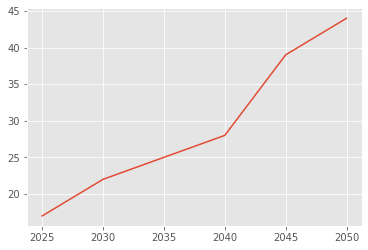

In [31]:
plt.plot(years,value)